In [1]:
# objective: 
# improve customer experience by analyzing sales Data
# Increase Revenue or to increase sales amount.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv')
df

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 267: invalid start byte

##    To avoid encoding error, use 'unicode_escape'.

In [5]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


#### Data Cleaning

In [6]:
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [9]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [16]:
df[df.isnull()].columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [17]:
df.isna().columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [19]:
df.isna().any()

User_ID             False
Cust_name           False
Product_ID          False
Gender              False
Age Group           False
Age                 False
Marital_Status      False
State               False
Zone                False
Occupation          False
Product_Category    False
Orders              False
Amount               True
Status               True
unnamed1             True
dtype: bool

In [25]:
df.columns[df.isna()=='True']

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

### Tch it.o get the name of the columns which has null values.
##### write the below syntax to fetch it.

In [41]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [42]:
pd.isna(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [40]:
df.isna().any()

User_ID             False
Cust_name           False
Product_ID          False
Gender              False
Age Group           False
Age                 False
Marital_Status      False
State               False
Zone                False
Occupation          False
Product_Category    False
Orders              False
Amount               True
dtype: bool

In [32]:
df.columns[df.isna().any()]

Index(['Amount', 'Status', 'unnamed1'], dtype='object')

In [33]:
df[df.columns[df.isna().any()]].columns

Index(['Amount', 'Status', 'unnamed1'], dtype='object')

In [34]:
df[df.columns[df.isnull().any()]].columns

Index(['Amount', 'Status', 'unnamed1'], dtype='object')

In [35]:
# delete unrelated/ blank column which has null values
df.drop(columns=['Status', 'unnamed1'], axis=1, inplace=True)

In [36]:
# to check if those columns exist or not.
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [43]:
# drop null values
df.dropna(axis=0,inplace=True)

In [44]:
# checking the null values
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [46]:
df['Amount']

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11239, dtype: float64

In [47]:
# change the datatype 
df['Amount'] = df['Amount'].astype(int)

In [49]:
df[['Amount']]

,Amount
0,23952
1,23934
2,23924
3,23912
4,23877
...,...
11246,370
11247,367
11248,213
11249,206


In [52]:
df.Amount.dtype

dtype('int32')

In [53]:
# checking the datatype of all the columns
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

In [54]:
# to check the columns in the dataset
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [56]:
# renaming the columns
df.rename(columns={'Marital_Status':'Shaadi'}).columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Shaadi', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

In [58]:
# describe() method returns description of the data in the Dataframe (i.e count,mean,std,etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [59]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [60]:
# use describe() for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


### Exploratory Data Analysis

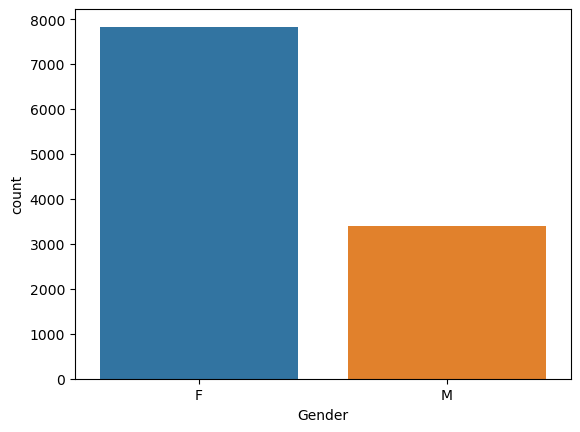

In [64]:
sns.countplot(x = 'Gender', data = df)
plt.show()

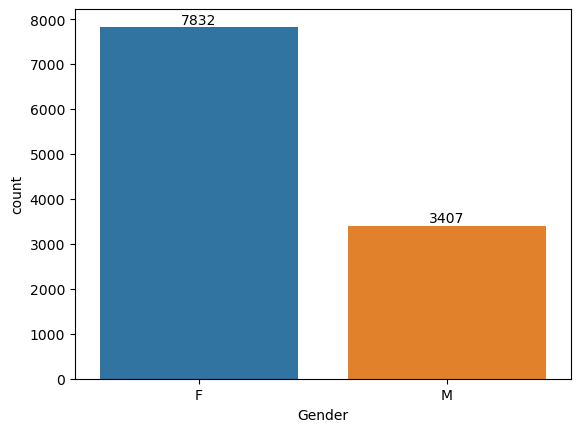

In [66]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

In [81]:
df.groupby('Gender')['Amount'].sum()

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

In [82]:
df.groupby('Gender')['Amount'].sum().sort_values()

Gender
M    31913276
F    74335853
Name: Amount, dtype: int32

In [70]:
df.groupby('Gender')['Amount'].sum().reset_index()

,Gender,Amount
0,F,74335853
1,M,31913276


In [84]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


In [74]:
df.groupby(['Gender'], as_index=True)['Amount'].sum().s

Gender
F    74335853
M    31913276
Name: Amount, dtype: int32

In [75]:
df.groupby(['Gender'], as_index=True)['Amount'].sum().reset_index()

,Gender,Amount
0,F,74335853
1,M,31913276


In [ ]:
df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)

In [86]:
sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sales

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

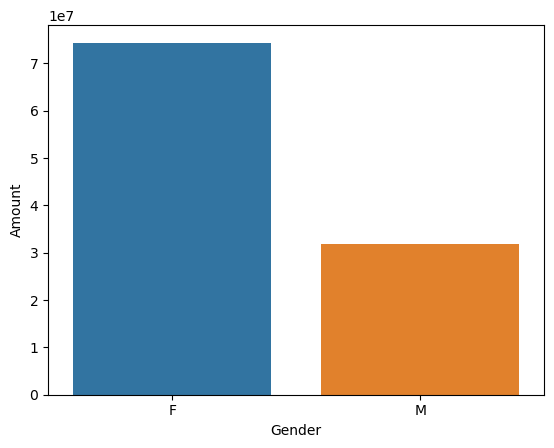

In [85]:
sales = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales)

#### From the above  graphs we can see that most of the buyers are females and even the purchaing power of females are greater than males.

### Age

In [87]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

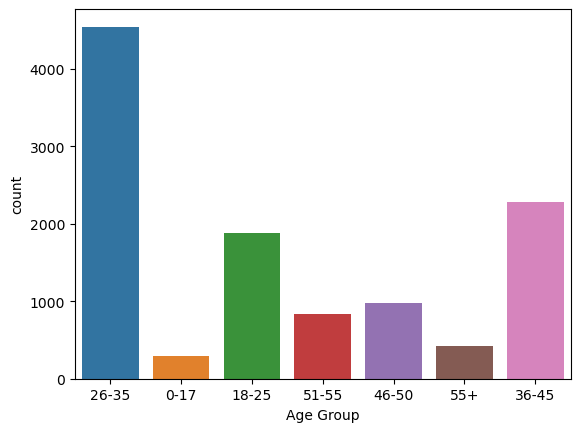

In [88]:
sns.countplot(x = 'Age Group', data = df)

<AxesSubplot:xlabel='Age Group', ylabel='count'>

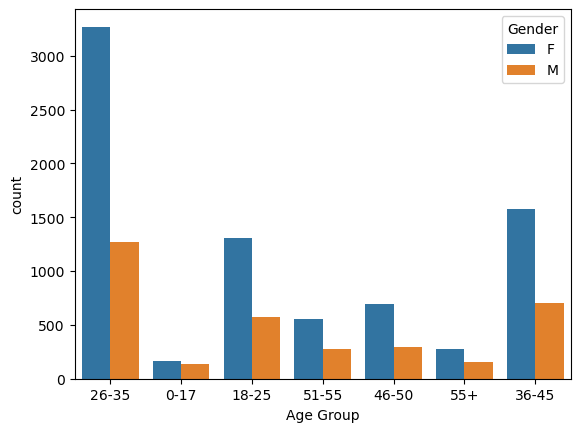

In [93]:
sns.countplot(x = 'Age Group', data = df, hue='Gender')

<AxesSubplot:xlabel='Age Group', ylabel='count'>

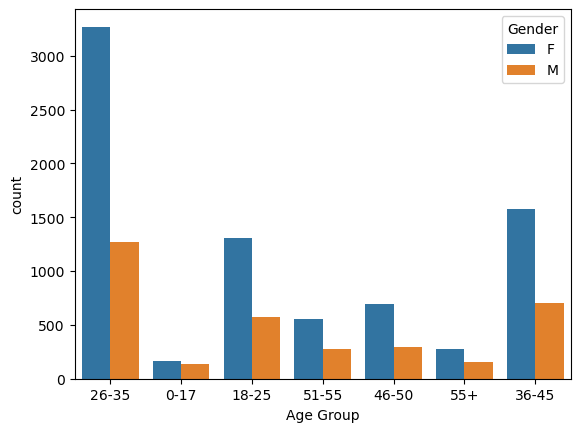

In [89]:
sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

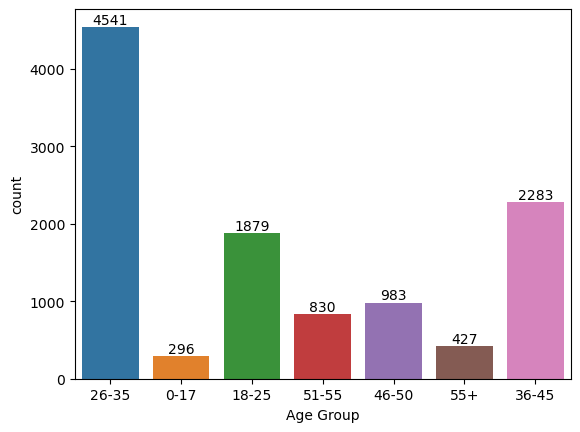

In [107]:
ax = sns.countplot(x = 'Age Group', data = df )

for bars in ax.containers:
    ax.bar_label(bars)

In [96]:
df['Age Group'].dtype

dtype('O')

In [97]:
df['Age']

0        28
1        35
2        35
3        16
4        28
         ..
11246    19
11247    33
11248    40
11249    37
11250    19
Name: Age, Length: 11239, dtype: int64

In [95]:
df['Age Group']

0        26-35
1        26-35
2        26-35
3         0-17
4        26-35
         ...  
11246    18-25
11247    26-35
11248    36-45
11249    36-45
11250    18-25
Name: Age Group, Length: 11239, dtype: object

In [102]:
df.groupby('Age Group', as_index=False)[['Amount']].sum().sort_values(by = 'Amount', ascending= False)

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


In [101]:
# Total Amount vs Age Group

df.groupby('Age Group')[['Amount']].sum().sort_values(by = 'Amount', ascending= False)

,Amount
Age Group,
26-35,42613442
36-45,22144994
18-25,17240732
46-50,9207844
51-55,8261477
55+,4080987
0-17,2699653


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

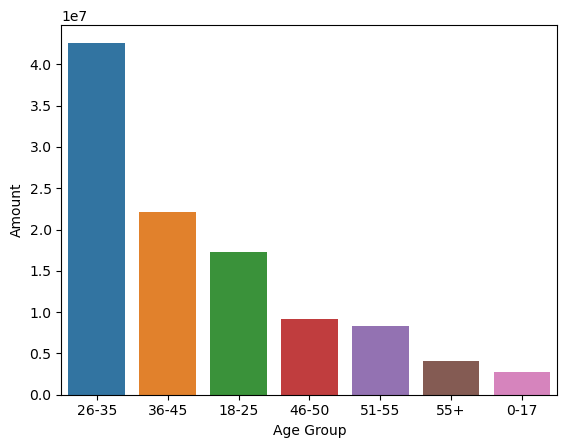

In [104]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(
by = 'Amount', ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)

##### From above graph most of the buyers lies in the Age group of 26 to 35
#### And as we already know womens are most buyers, lets see by plotting again.

<AxesSubplot:xlabel='Age Group', ylabel='count'>

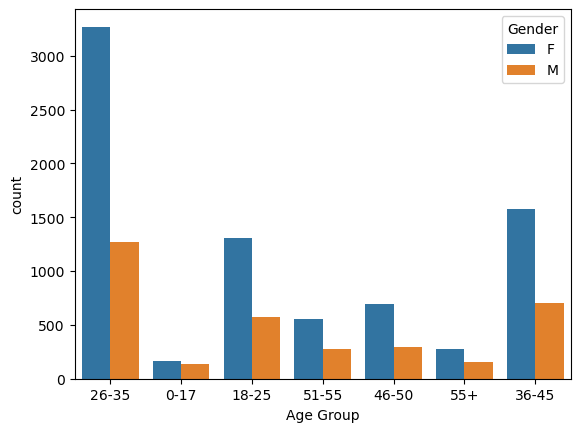

In [109]:
sns.countplot(x = 'Age Group', data = df, hue = 'Gender')

### State

In [110]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [113]:
# lets check which state has maximum orders
df.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders',
                                                             ascending = False)

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


In [ ]:
# # lets check which state has maximum orders top 10
df.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders',
                                                             ascending = False)

<AxesSubplot:xlabel='State', ylabel='Orders'>

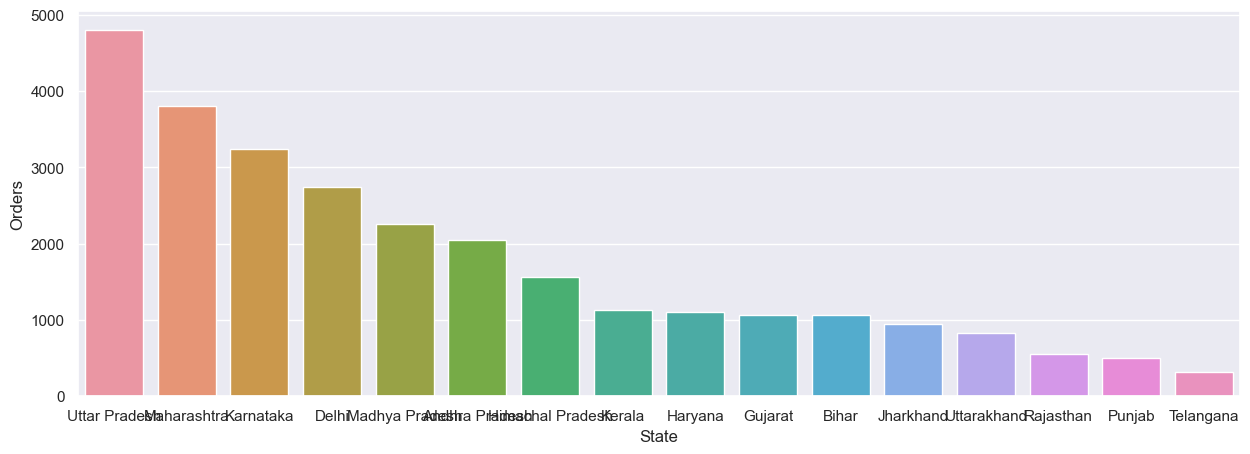

In [115]:
# lets check which state has maximum orders top 10
sales_state = df.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders',
                                                             ascending = False)

#sns.set(rc = {'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State', y = 'Orders')

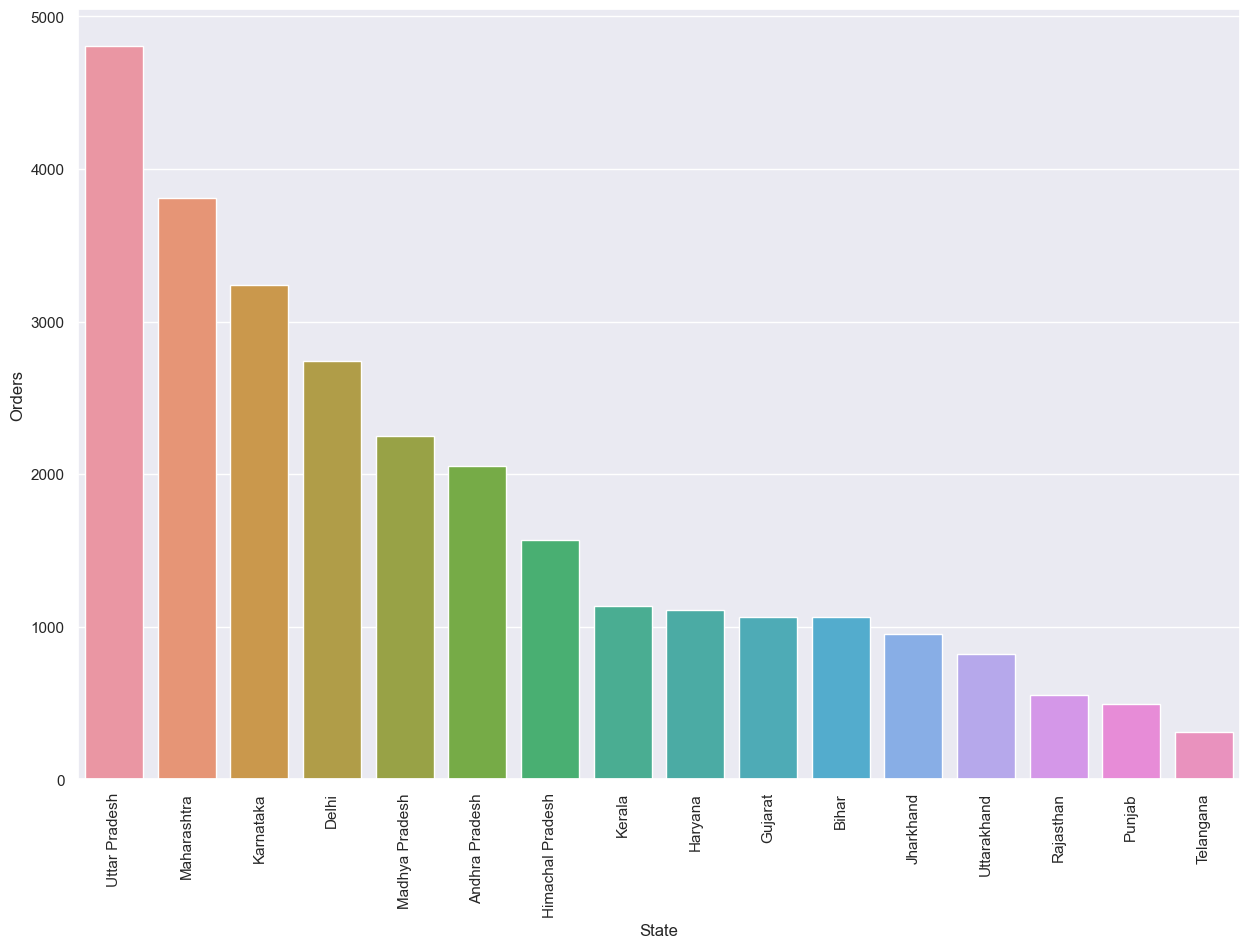

In [120]:
# lets check which state has maximum orders top 10
sales_state = df.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders',
                                                             ascending = False)

sns.set(rc = {'figure.figsize':(15,10)})
# width  = 15
# Hwight = 10
sns.barplot(data = sales_state, x = 'State', y = 'Orders')
plt.xticks(rotation = 90)
plt.show()

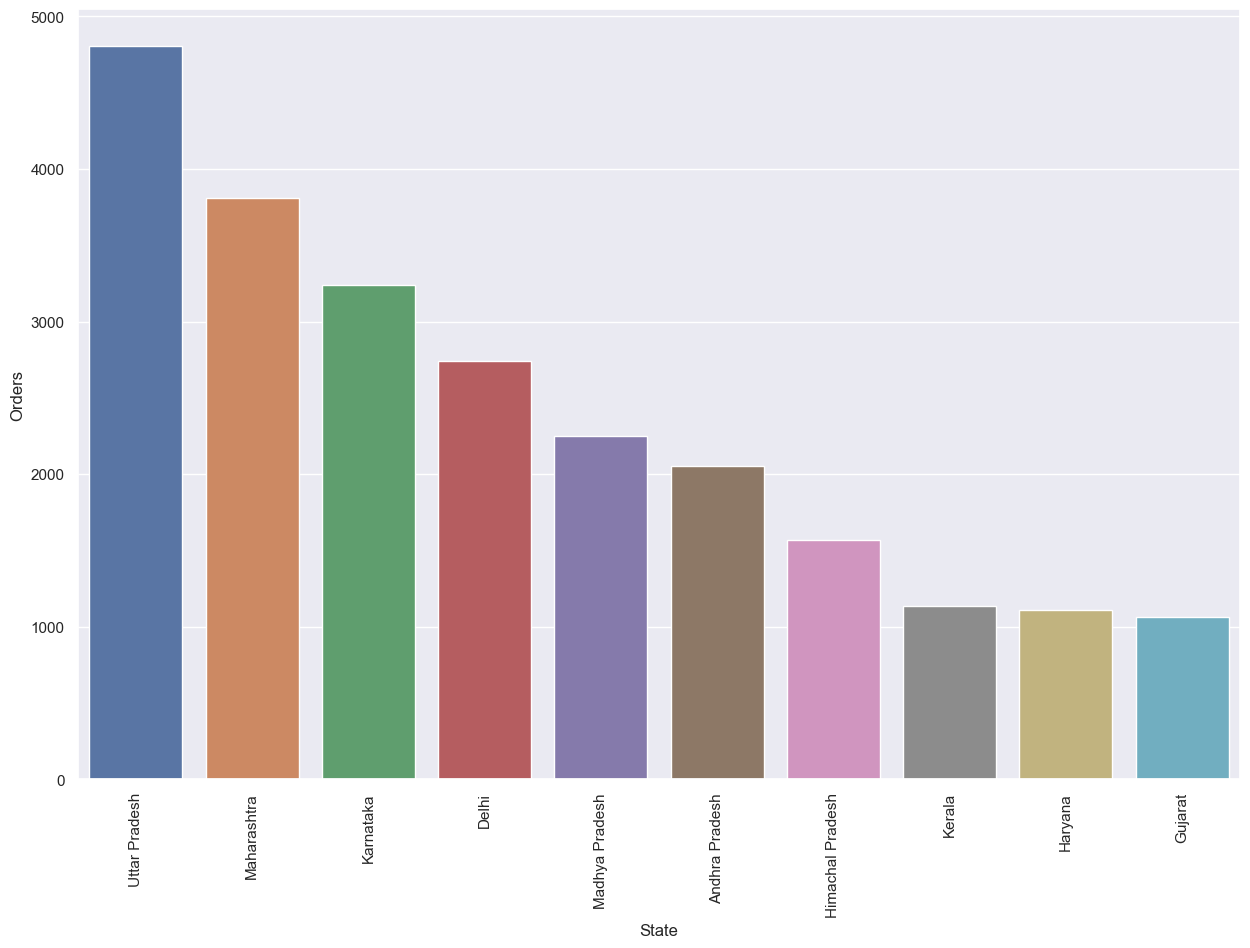

In [121]:
# top 10
sales_state = df.groupby('State')['Orders'].sum().reset_index().sort_values(by = 'Orders',
                                                             ascending = False).head(10)

sns.set(rc = {'figure.figsize':(15,10)})
# width  = 15
# Hwight = 10
sns.barplot(data = sales_state, x = 'State', y = 'Orders')
plt.xticks(rotation = 90)
plt.show()

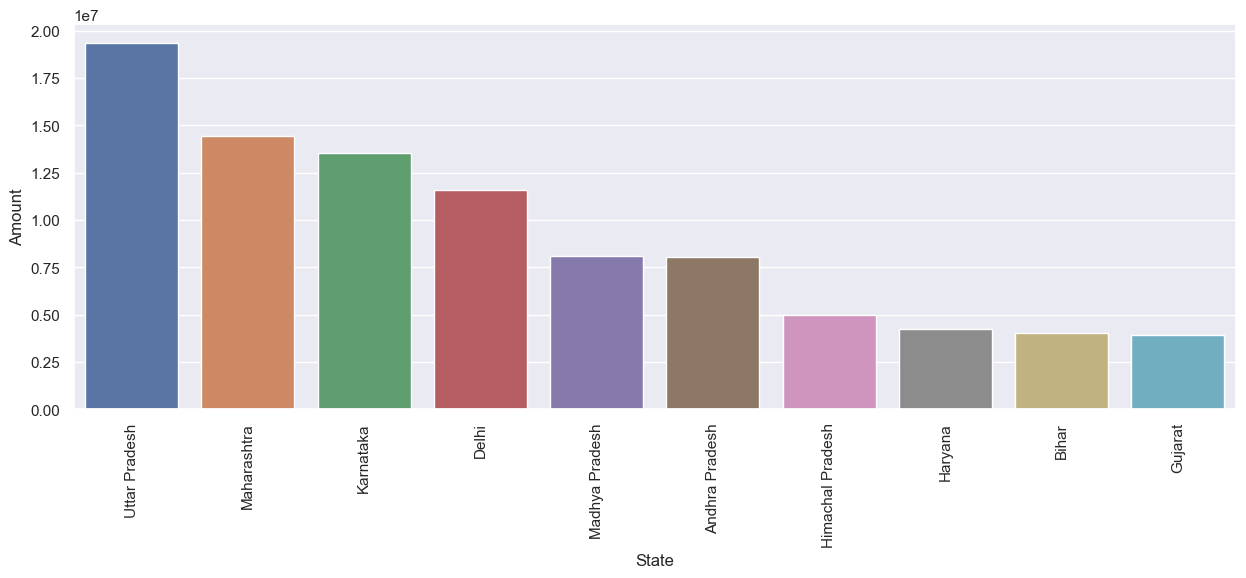

In [131]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')
plt.xticks(rotation = 90)
plt.show()

*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

In [122]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [123]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

In [141]:
# which product has been sold the Most
df.groupby('Product_Category')[['Amount']].sum().sort_values(by = 'Amount',
                                                             ascending = False)

,Amount
Product_Category,
Food,33933883
Clothing & Apparel,16495019
Electronics & Gadgets,15643846
Footwear & Shoes,15575209
Furniture,5440051
Games & Toys,4331694
Sports Products,3635933
Beauty,1959484
Auto,1958609


In [140]:
# which product has been sold the Most
df.groupby('Product_Category')[['Amount']].sum().sort_values(by = 'Amount',
                                                             ascending = False).head(10)

,Amount
Product_Category,
Food,33933883
Clothing & Apparel,16495019
Electronics & Gadgets,15643846
Footwear & Shoes,15575209
Furniture,5440051
Games & Toys,4331694
Sports Products,3635933
Beauty,1959484
Auto,1958609


### Marital Status

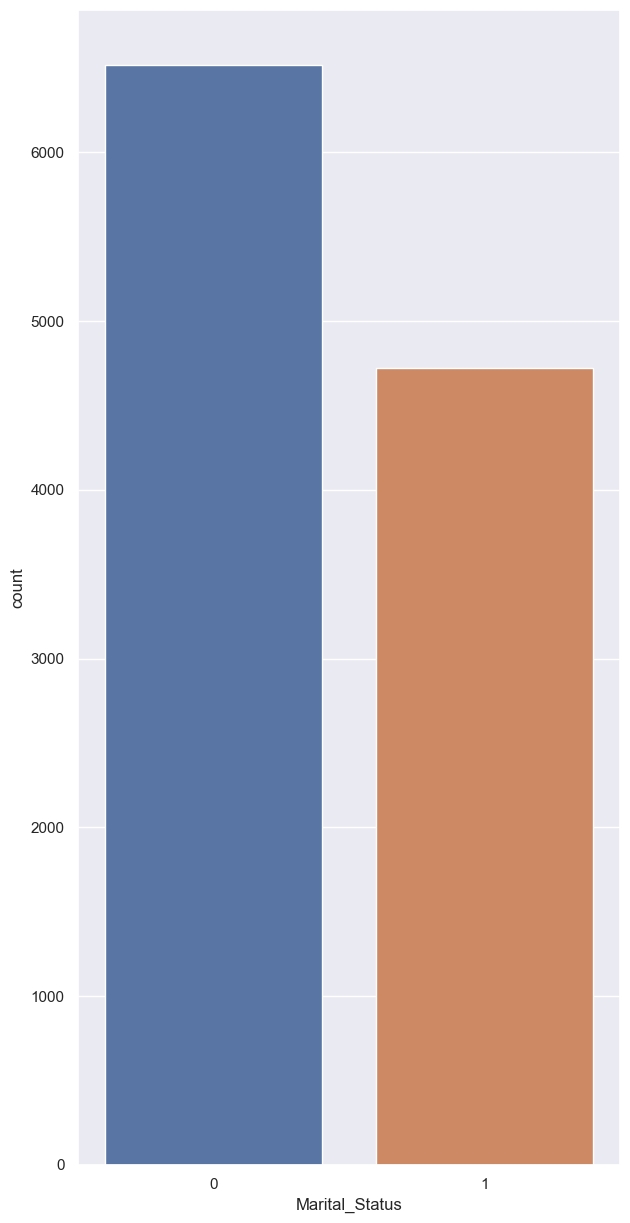

In [157]:
ax = sns.countplot(data = df, x = 'Marital_Status')

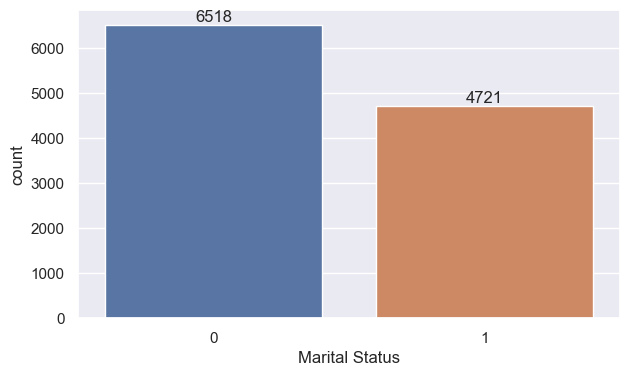

In [163]:
ax = sns.countplot(data = df, x = 'Marital_Status')
plt.xlabel('Marital Status')
sns.set(rc={'figure.figsize':(7,4)})
for bars in ax.containers:
    ax.bar_label(bars)

In [169]:
df.groupby('Marital_Status')df[(df.Gender=='F')]['Amount'].sum()

SyntaxError: invalid syntax (341344027.py, line 1)

In [166]:
df.groupby(['Marital_Status','Gender']).get_group('F')['Amount'].sum()

ValueError: must supply a tuple to get_group with multiple grouping keys

In [200]:
df[df.Gender=='F'].groupby('Marital_Status')[['Amount','Gender']].sum()

,Amount
Marital_Status,
0,43786646
1,30549207


In [194]:
# for Females
df[(df.Gender=='F')].groupby('Marital_Status')['Amount'].sum()

Marital_Status
0    43786646
1    30549207
Name: Amount, dtype: int32

In [192]:
# for Males
df[(df.Gender=='M')].groupby('Marital_Status')['Amount'].sum().reset_index()

,Marital_Status,Amount
0,0,18338738
1,1,13574538


SyntaxError: invalid syntax (3225336529.py, line 1)

In [164]:
# to check whether who spends a lot, married or Single?
df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(
by = 'Amount', ascending = False)

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

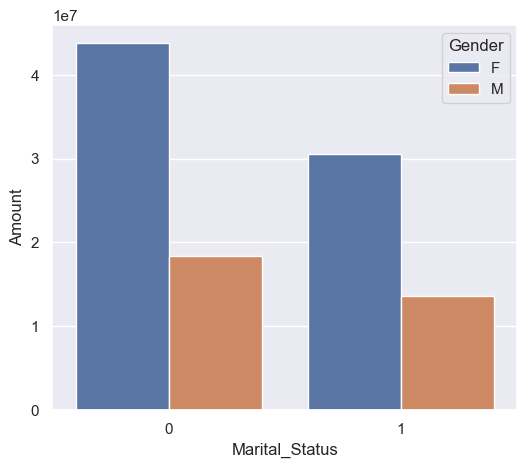

In [174]:
sales_state = df.groupby(['Marital_Status','Gender'], as_index=False)['Amount'].sum().sort_values(
by = 'Amount', ascending = False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status', y = 'Amount',
           hue = 'Gender')

*From above graphs we can see that most of the buyers are married (women) and they have high Purchasing Power*

In [201]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [204]:
# People who have high purchasing power belongs to which sector
df.groupby('Occupation')[['Amount']].sum().sort_values(by = 'Amount',
                                                      ascending = False)

,Amount
Occupation,
IT Sector,14755079
Healthcare,13034586
Aviation,12602298
Banking,10770610
Govt,8517212
Hospitality,6376405
Media,6295832
Automobile,5368596
Chemical,5297436


In [206]:
df.groupby('Occupation')[['Gender','Amount']].sum().sort_values(by = 'Amount',
                                                      ascending = False)

,Amount
Occupation,
IT Sector,14755079
Healthcare,13034586
Aviation,12602298
Banking,10770610
Govt,8517212
Hospitality,6376405
Media,6295832
Automobile,5368596
Chemical,5297436


In [209]:
# who spends a lot with resepctive to every sector -- male or Female?
df.groupby(['Occupation','Gender'])[['Amount']].sum()

Amount
Occupation      Gender          
Agriculture     F        1840482
                M         752605
Automobile      F        3768843
                M        1599753
Aviation        F        9007393
                M        3594905
Banking         F        7792295
                M        2978315
Chemical        F        3665084
                M        1632352
Construction    F        2595422
                M        1002089
Food Processing F        2825277
                M        1245393
Govt            F        6002907
                M        2514305
Healthcare      F        8968231
                M        4066355
Hospitality     F        4183199
                M        2193206
IT Sector       F       10184835
                M        4570244
Lawyer          F        3383409
                M        1598256
Media           F        4375029
                M        1920803
Retail          F        3583695
                M        1199475
Textile         F        2159752
                M        1045220

In [210]:
df.groupby(['Gender','Occupation'])[['Amount']].sum()

Amount
Gender Occupation               
F      Agriculture       1840482
       Automobile        3768843
       Aviation          9007393
       Banking           7792295
       Chemical          3665084
       Construction      2595422
       Food Processing   2825277
       Govt              6002907
       Healthcare        8968231
       Hospitality       4183199
       IT Sector        10184835
       Lawyer            3383409
       Media             4375029
       Retail            3583695
       Textile           2159752
M      Agriculture        752605
       Automobile        1599753
       Aviation          3594905
       Banking           2978315
       Chemical          1632352
       Construction      1002089
       Food Processing   1245393
       Govt              2514305
       Healthcare        4066355
       Hospitality       2193206
       IT Sector         4570244
       Lawyer            1598256
       Media             1920803
       Retail            1199475
       Textile           1045220

In [212]:
df.groupby(['Occupation','Gender'])[['Amount']].sum().sort_values(by = 'Amount',
                                                      ascending = False)

,,Amount
Occupation,Gender,
IT Sector,F,10184835
Aviation,F,9007393
Healthcare,F,8968231
Banking,F,7792295
Govt,F,6002907
IT Sector,M,4570244
Media,F,4375029
Hospitality,F,4183199
Healthcare,M,4066355


In [220]:
df.groupby(['Occupation','Gender'])[['Amount']].sum()

Amount
Occupation      Gender          
Agriculture     F        1840482
                M         752605
Automobile      F        3768843
                M        1599753
Aviation        F        9007393
                M        3594905
Banking         F        7792295
                M        2978315
Chemical        F        3665084
                M        1632352
Construction    F        2595422
                M        1002089
Food Processing F        2825277
                M        1245393
Govt            F        6002907
                M        2514305
Healthcare      F        8968231
                M        4066355
Hospitality     F        4183199
                M        2193206
IT Sector       F       10184835
                M        4570244
Lawyer          F        3383409
                M        1598256
Media           F        4375029
                M        1920803
Retail          F        3583695
                M        1199475
Textile         F        2159752
                M        1045220

### Occupation

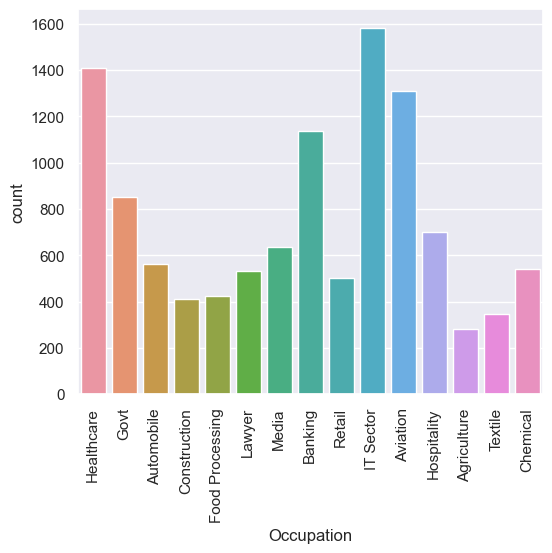

In [224]:
ax = sns.countplot(data = df, x = 'Occupation')
plt.xticks(rotation = 90)
plt.show()

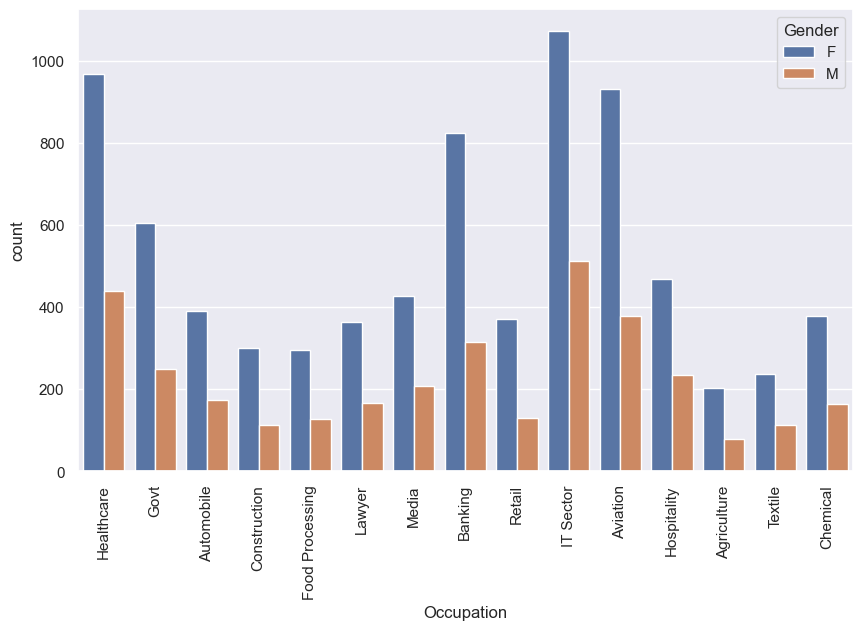

In [231]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(data = df, x = 'Occupation', hue = 'Gender')
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Healthcare'),
  Text(1, 0, 'Govt'),
  Text(2, 0, 'Automobile'),
  Text(3, 0, 'Construction'),
  Text(4, 0, 'Food Processing'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media'),
  Text(7, 0, 'Banking'),
  Text(8, 0, 'Retail'),
  Text(9, 0, 'IT Sector'),
  Text(10, 0, 'Aviation'),
  Text(11, 0, 'Hospitality'),
  Text(12, 0, 'Agriculture'),
  Text(13, 0, 'Textile'),
  Text(14, 0, 'Chemical')])

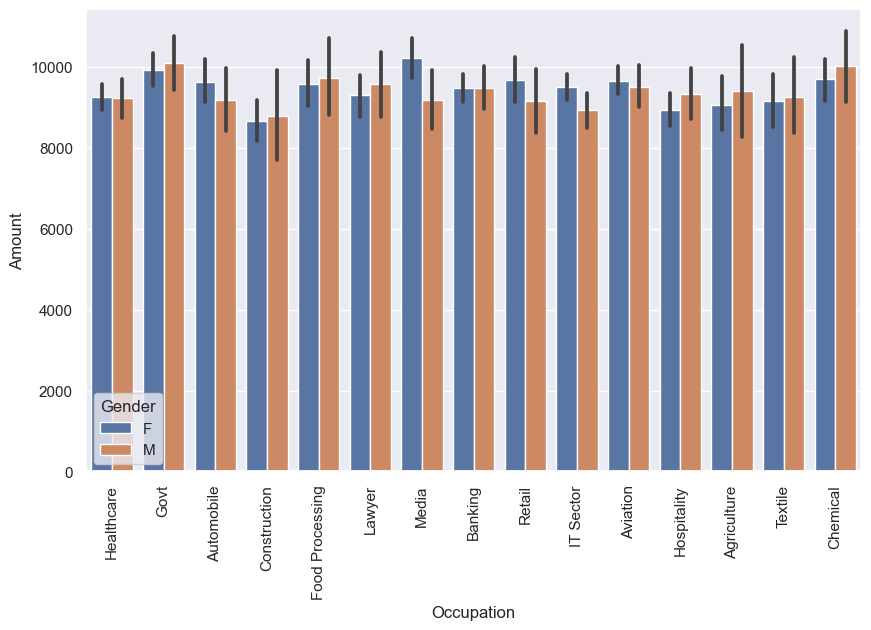

In [235]:
sns.barplot(data = df, x = 'Occupation', y = 'Amount',hue = 'Gender')
plt.xticks(rotation = 90)

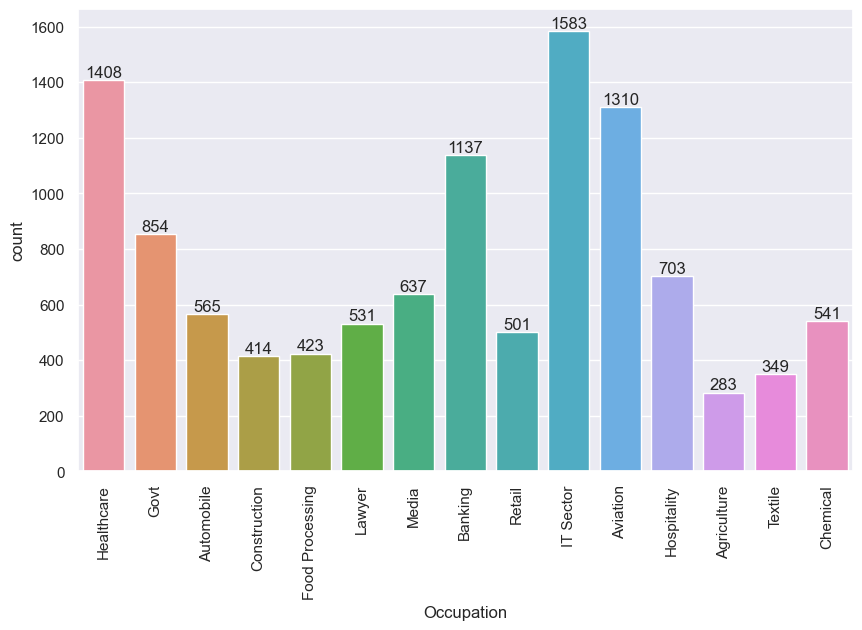

In [237]:
ax = sns.countplot(data = df, x = 'Occupation')
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars)

*From above graphs we can see that most of the buyers are working in IT, Aviation and Healthcare Sector.*

In [247]:
ab = df.groupby('Occupation')[['Amount']].sum().sort_values(by = 'Amount', ascending = False).reset_index()
ab

,Occupation,Amount
0,IT Sector,14755079
1,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
4,Govt,8517212
5,Hospitality,6376405
6,Media,6295832
7,Automobile,5368596
8,Chemical,5297436
9,Lawyer,4981665


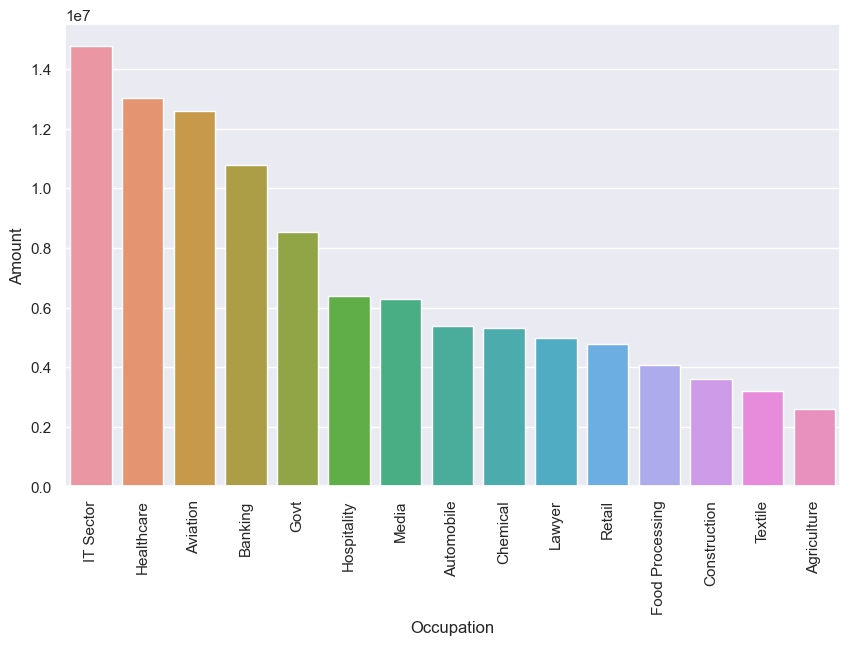

In [255]:
sns.barplot(data = ab,x = 'Occupation', y = 'Amount')
plt.xticks(rotation = 90)
plt.show()

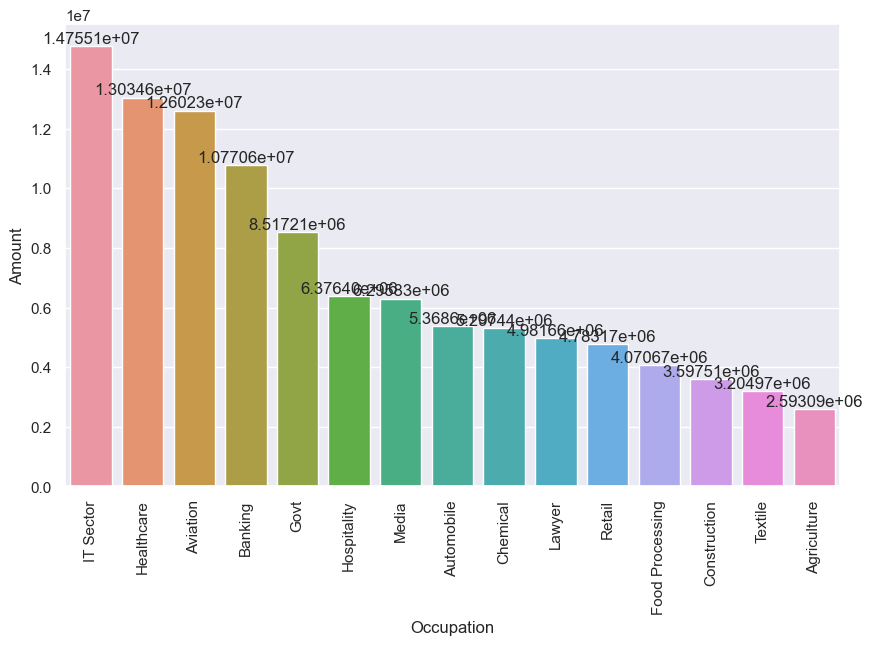

In [252]:
ax = sns.barplot(data = ab , x = 'Occupation', y = 'Amount')
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars, label_type='edge')

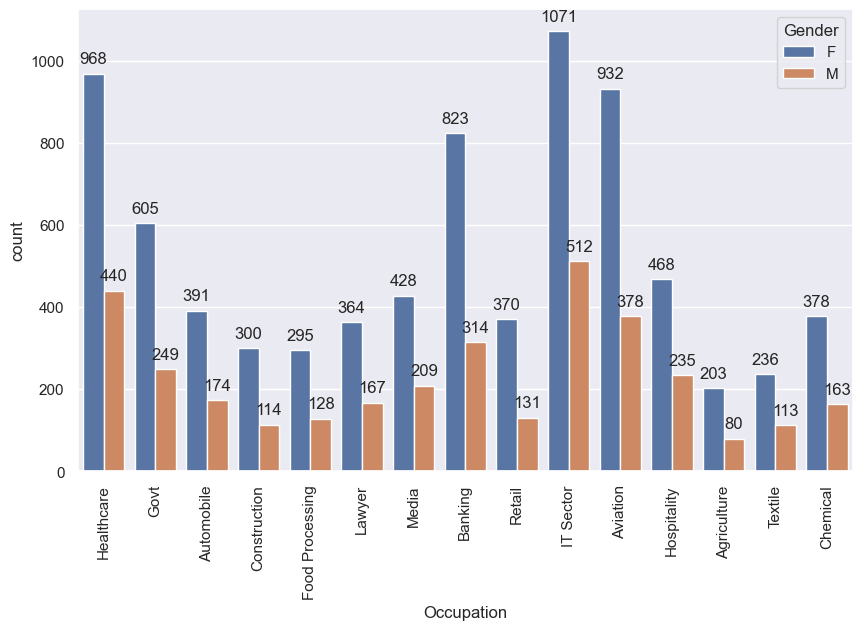

In [241]:
ax = sns.countplot(data = df, x = 'Occupation', hue = 'Gender')
plt.xticks(rotation = 90)

for bars in ax.containers:
    ax.bar_label(bars, padding = 5)

In [256]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

### Product Category

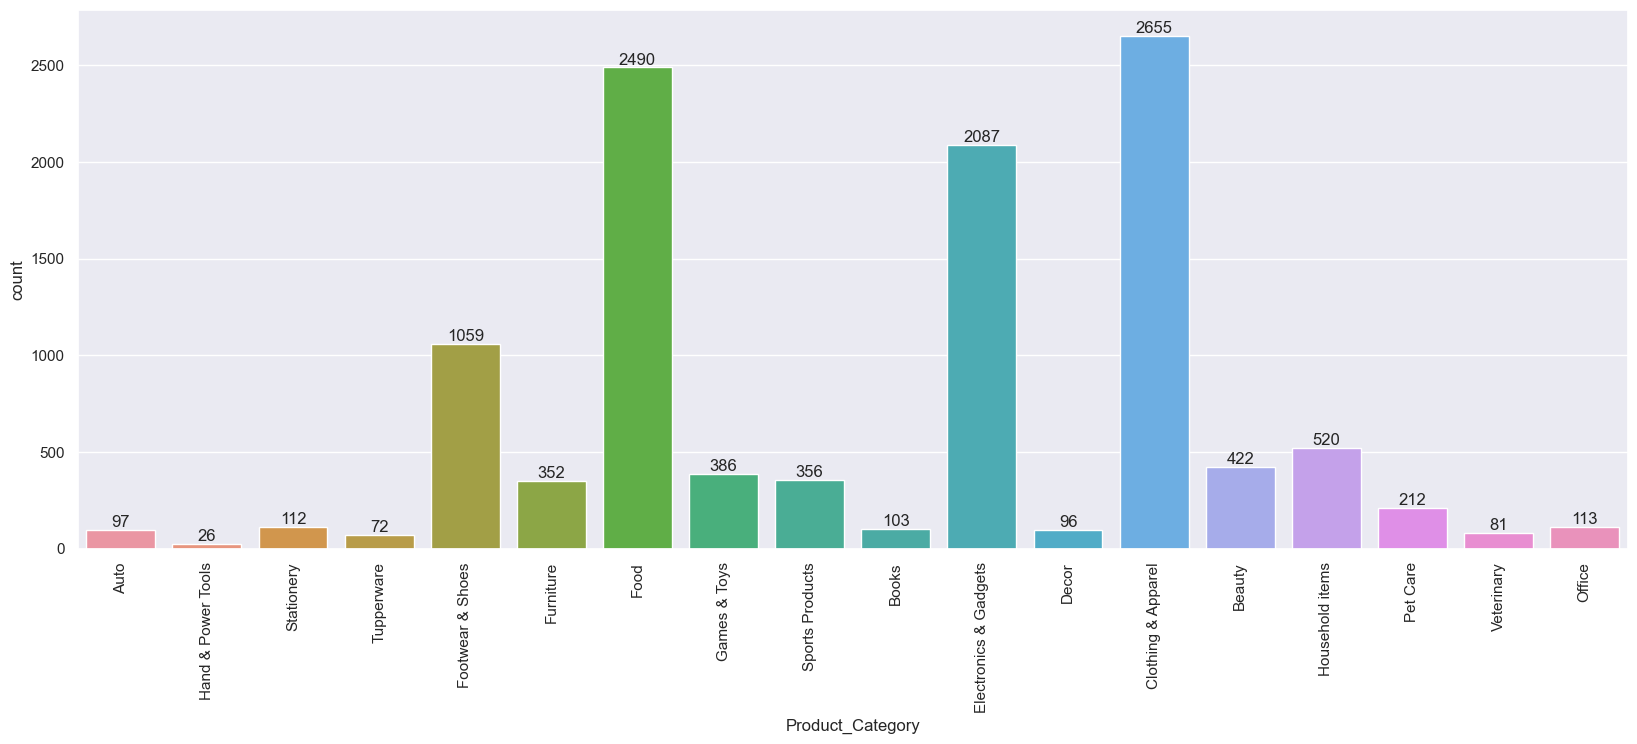

In [279]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation = 90)
for bars in ax.containers:
    ax.bar_label(bars)

In [270]:
sales_product = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending = False).reset_index()
sales_product

,Product_Category,Amount
0,Food,33933883
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15575209
4,Furniture,5440051
5,Games & Toys,4331694
6,Sports Products,3635933
7,Beauty,1959484
8,Auto,1958609
9,Stationery,1676051


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

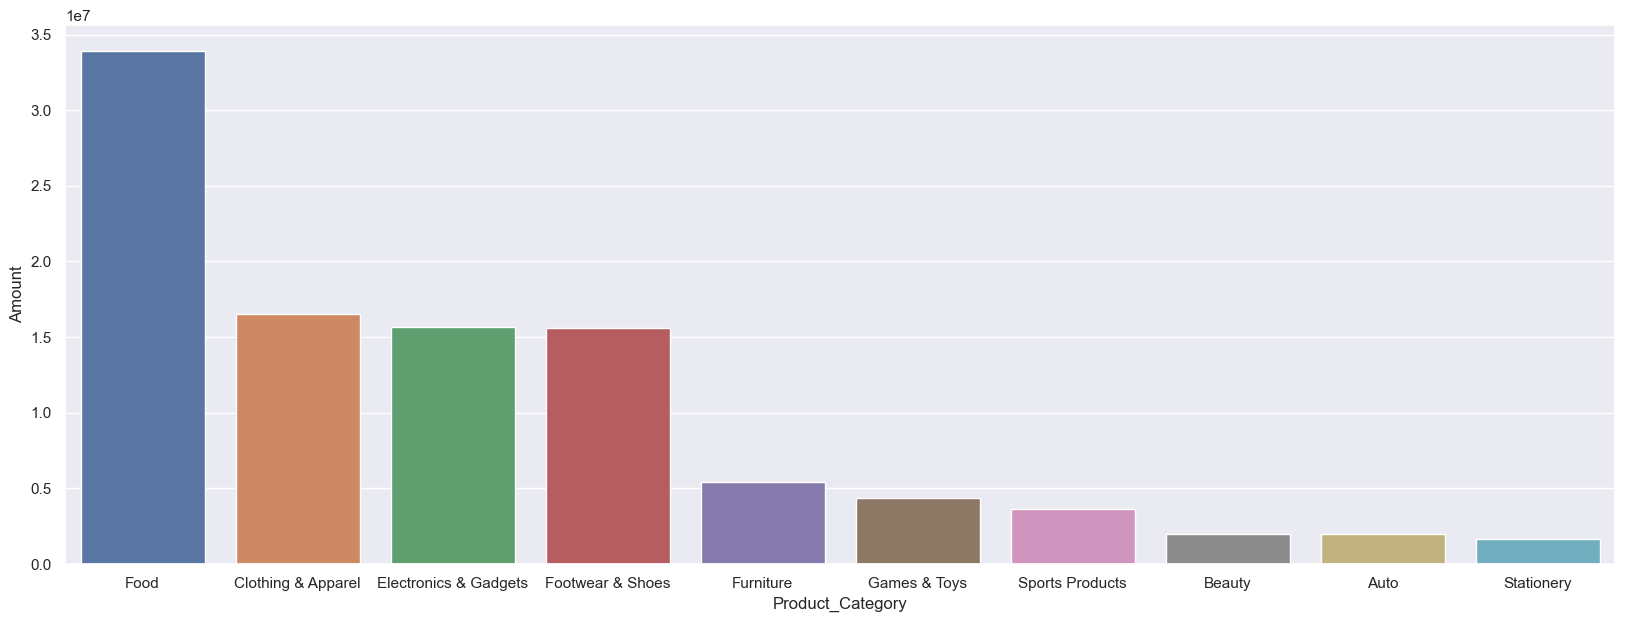

In [281]:
sns.barplot(data = sales_product.head(10), x = 'Product_Category', y = 'Amount')

*From above graphs we can see that most of the sold Products are from food, clothing, Footwear and Electronics category*

In [283]:
sales_product

,Product_Category,Amount
0,Food,33933883
1,Clothing & Apparel,16495019
2,Electronics & Gadgets,15643846
3,Footwear & Shoes,15575209
4,Furniture,5440051
5,Games & Toys,4331694
6,Sports Products,3635933
7,Beauty,1959484
8,Auto,1958609
9,Stationery,1676051


In [284]:
df.groupby(['Product_Category', 'Gender'])[['Amount']].sum()

Amount
Product_Category      Gender          
Auto                  F        1285791
                      M         672818
Beauty                F        1524257
                      M         435227
Books                 F         404215
                      M         657263
Clothing & Apparel    F       11479103
                      M        5015916
Decor                 F         596994
                      M         133366
Electronics & Gadgets F       11033097
                      M        4610749
Food                  F       24176102
                      M        9757781
Footwear & Shoes      F       11534547
                      M        4040662
Furniture             F        3394642
                      M        2045409
Games & Toys          F        3045258
                      M        1286436
Hand & Power Tools    F         127100
                      M         278518
Household items       F         859644
                      M         709693
Office                F          54983
                      M          26953
Pet Care              F         331509
                      M         150768
Sports Products       F        2675513
                      M         960420
Stationery            F         891897
                      M         784154
Tupperware            F         830965
                      M         324677
Veterinary            F          90236
                      M          22466

In [286]:
sales_product_gender = df.groupby(['Product_Category', 'Gender'])[['Amount']].sum().reset_index()
sales_product_gender

,Product_Category,Gender,Amount
0,Auto,F,1285791
1,Auto,M,672818
2,Beauty,F,1524257
3,Beauty,M,435227
4,Books,F,404215
5,Books,M,657263
6,Clothing & Apparel,F,11479103
7,Clothing & Apparel,M,5015916
8,Decor,F,596994
9,Decor,M,133366


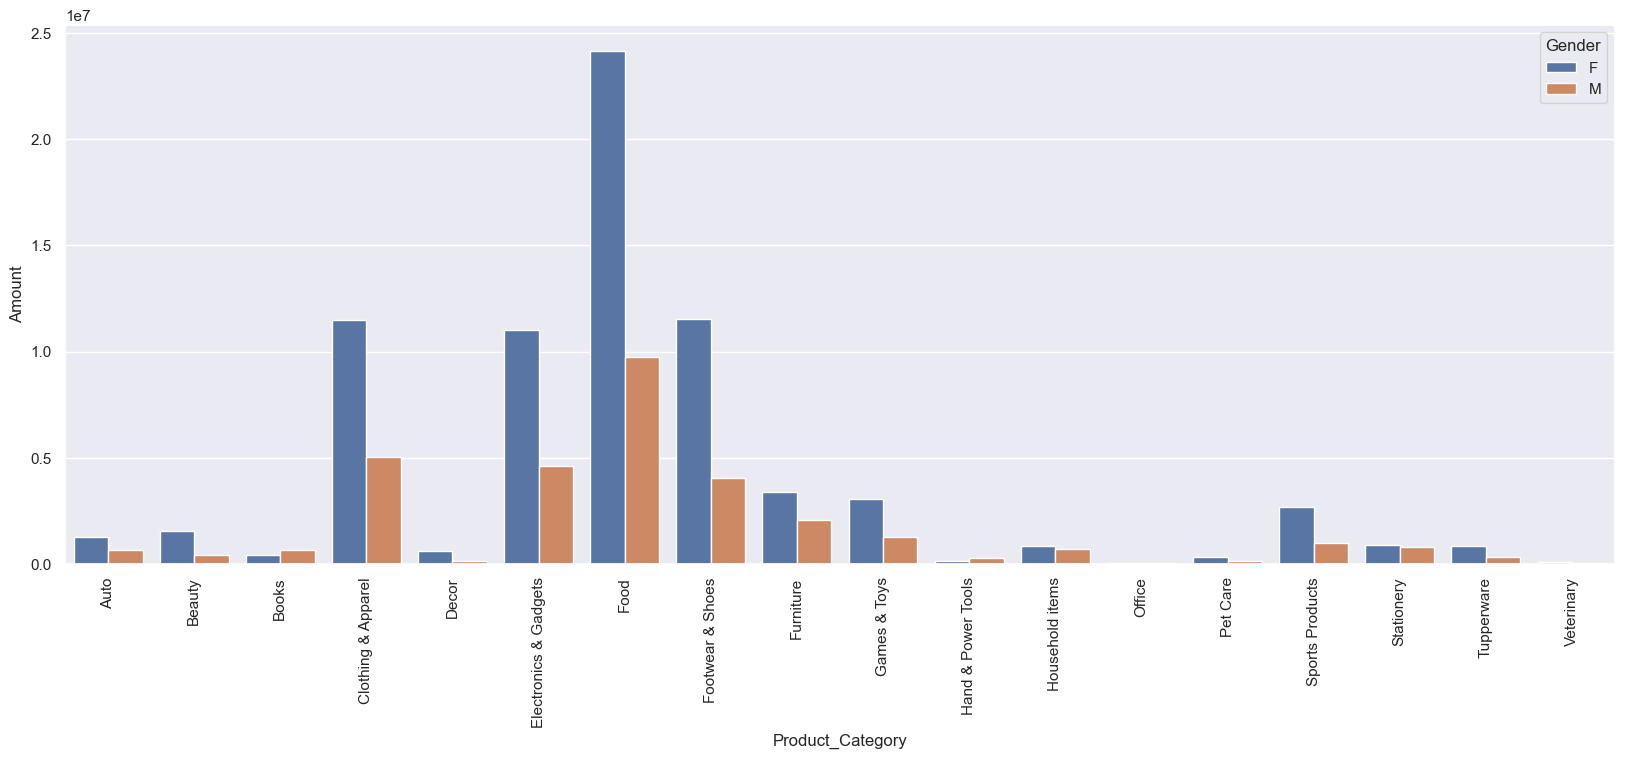

In [289]:
sns.barplot(data=sales_product_gender, x= 'Product_Category', y = 'Amount', hue = 'Gender')
plt.xticks(rotation = 90)
plt.show()

In [293]:
df.groupby(['Gender','Product_Category'])[['Amount']].sum().sort_values(by = 'Amount', ascending = False)

Amount
Gender Product_Category               
F      Food                   24176102
       Footwear & Shoes       11534547
       Clothing & Apparel     11479103
       Electronics & Gadgets  11033097
M      Food                    9757781
       Clothing & Apparel      5015916
       Electronics & Gadgets   4610749
       Footwear & Shoes        4040662
F      Furniture               3394642
       Games & Toys            3045258
       Sports Products         2675513
M      Furniture               2045409
F      Beauty                  1524257
M      Games & Toys            1286436
F      Auto                    1285791
M      Sports Products          960420
F      Stationery               891897
       Household items          859644
       Tupperware               830965
M      Stationery               784154
       Household items          709693
       Auto                     672818
       Books                    657263
F      Decor                    596994
M      Beauty                   435227
F      Books                    404215
       Pet Care                 331509
M      Tupperware               324677
       Hand & Power Tools       278518
       Pet Care                 150768
       Decor                    133366
F      Hand & Power Tools       127100
       Veterinary                90236
       Office                    54983
M      Office                    26953
       Veterinary                22466

In [294]:
spg = df.groupby(['Gender','Product_Category'])[['Amount']].sum().sort_values(by = 'Amount', ascending = False).reset_index()
spg 

,Gender,Product_Category,Amount
0,F,Food,24176102
1,F,Footwear & Shoes,11534547
2,F,Clothing & Apparel,11479103
3,F,Electronics & Gadgets,11033097
4,M,Food,9757781
5,M,Clothing & Apparel,5015916
6,M,Electronics & Gadgets,4610749
7,M,Footwear & Shoes,4040662
8,F,Furniture,3394642
9,F,Games & Toys,3045258


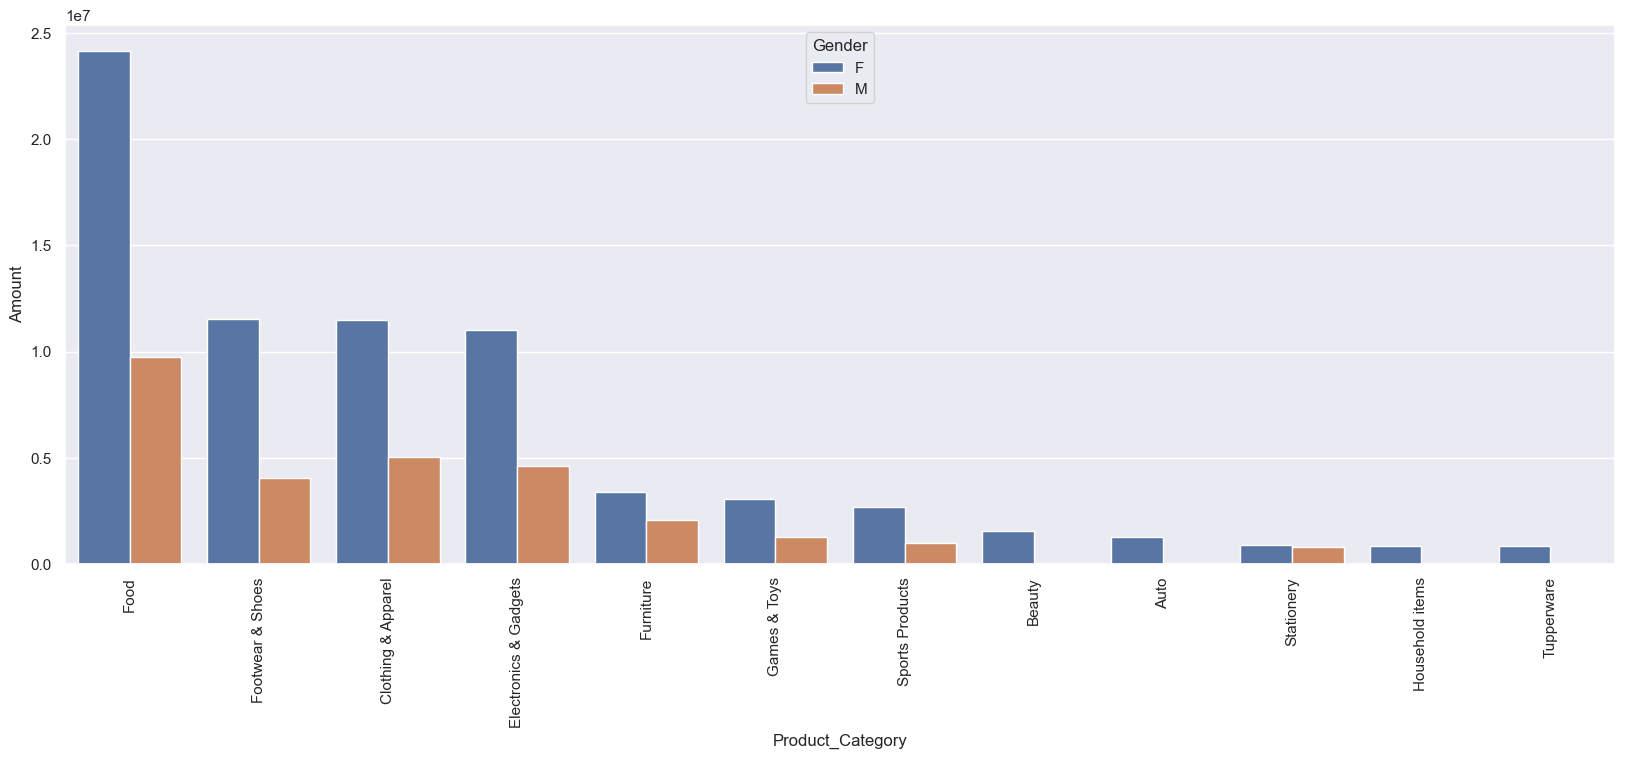

In [300]:
sns.barplot(data = spg.head(20), x = 'Product_Category', y = 'Amount', hue = 'Gender')
plt.xticks(rotation = 90)
plt.show()

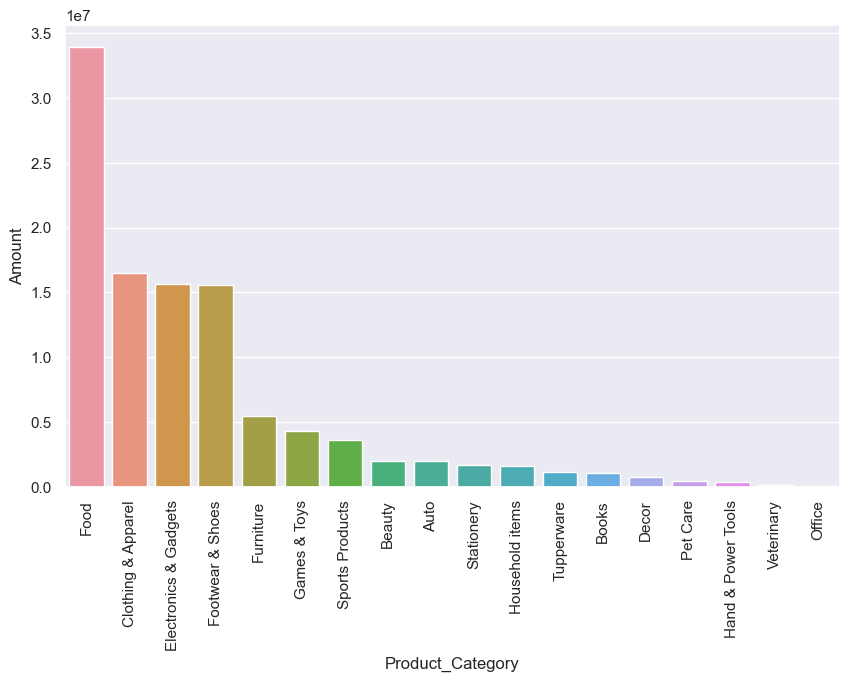

In [276]:
sns.barplot(data = sales_product, x = 'Product_Category', y = 'Amount')
plt.xticks(rotation = 90)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Hand & Power Tools'),
  Text(2, 0, 'Stationery'),
  Text(3, 0, 'Tupperware'),
  Text(4, 0, 'Footwear & Shoes'),
  Text(5, 0, 'Furniture'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Games & Toys'),
  Text(8, 0, 'Sports Products'),
  Text(9, 0, 'Books'),
  Text(10, 0, 'Electronics & Gadgets'),
  Text(11, 0, 'Decor'),
  Text(12, 0, 'Clothing & Apparel'),
  Text(13, 0, 'Beauty'),
  Text(14, 0, 'Household items'),
  Text(15, 0, 'Pet Care'),
  Text(16, 0, 'Veterinary'),
  Text(17, 0, 'Office')])

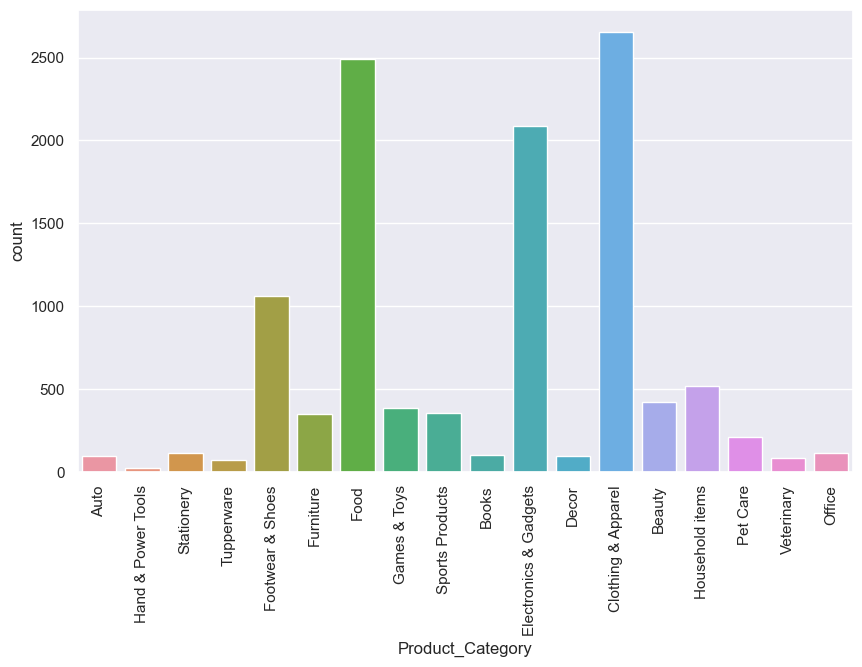

In [269]:
sns.countplot(data = df, x = 'Product_Category')
plt.xticks(rotation = 90)

In [301]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [325]:
#Most Selling Products
df.groupby(['Product_ID'])[['Orders']].sum().sort_values(by = 'Orders', ascending = False)

,Orders
Product_ID,
P00265242,127
P00110942,116
P00237542,91
P00184942,82
P00114942,79
...,...
P00066142,1
P00213442,1
P00064342,1


In [329]:
df['Orders'].max()

4

In [332]:
# people whio bought the most products at a time
df[(df.Orders==4)]


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
13,1001680,Vasudev,P00324942,M,26-35,26,1,Andhra Pradesh,Southern,Automobile,Auto,4,23718
20,1000113,Ellis,P00180642,F,18-25,19,1,Andhra Pradesh,Southern,Govt,Auto,4,23546
27,1004736,Mahima,P00058042,F,18-25,25,1,Andhra Pradesh,Southern,Banking,Auto,4,23451
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11219,1004268,Rosenblatt,P00302942,M,46-50,48,0,Himachal Pradesh,Northern,Govt,Office,4,580
11223,1001542,Buch,P00113642,F,18-25,20,1,Maharashtra,Western,Aviation,Office,4,574
11236,1002168,Hightower,P00145842,M,0-17,17,1,Himachal Pradesh,Northern,Agriculture,Office,4,560
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370


*So there are total 2773 people who purschased 4 items at a time.*

In [333]:
df[(df.Orders==4)]['Amount'].max()

23841

In [334]:
# customer with high order and Amount.
df[(df.Orders==4) & (df.Amount==23841)]

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841


In [338]:
sales_state = df.groupby(['Product_ID'])[['Orders']].sum().sort_values(by = 'Orders', ascending = False).head(10).reset_index()
sales_state

,Product_ID,Orders
0,P00265242,127
1,P00110942,116
2,P00237542,91
3,P00184942,82
4,P00114942,79
5,P00025442,79
6,P00117942,76
7,P00145042,76
8,P00044442,75
9,P00110842,74


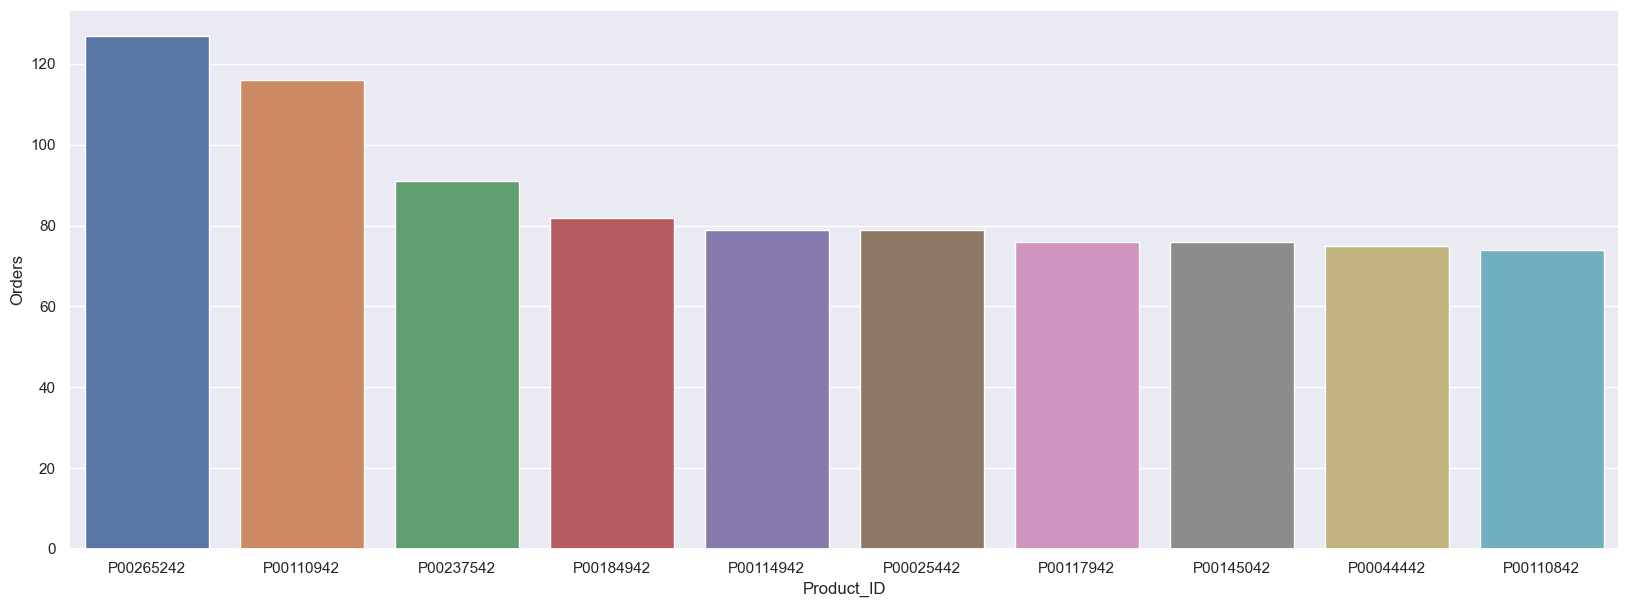

In [340]:
ax = sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

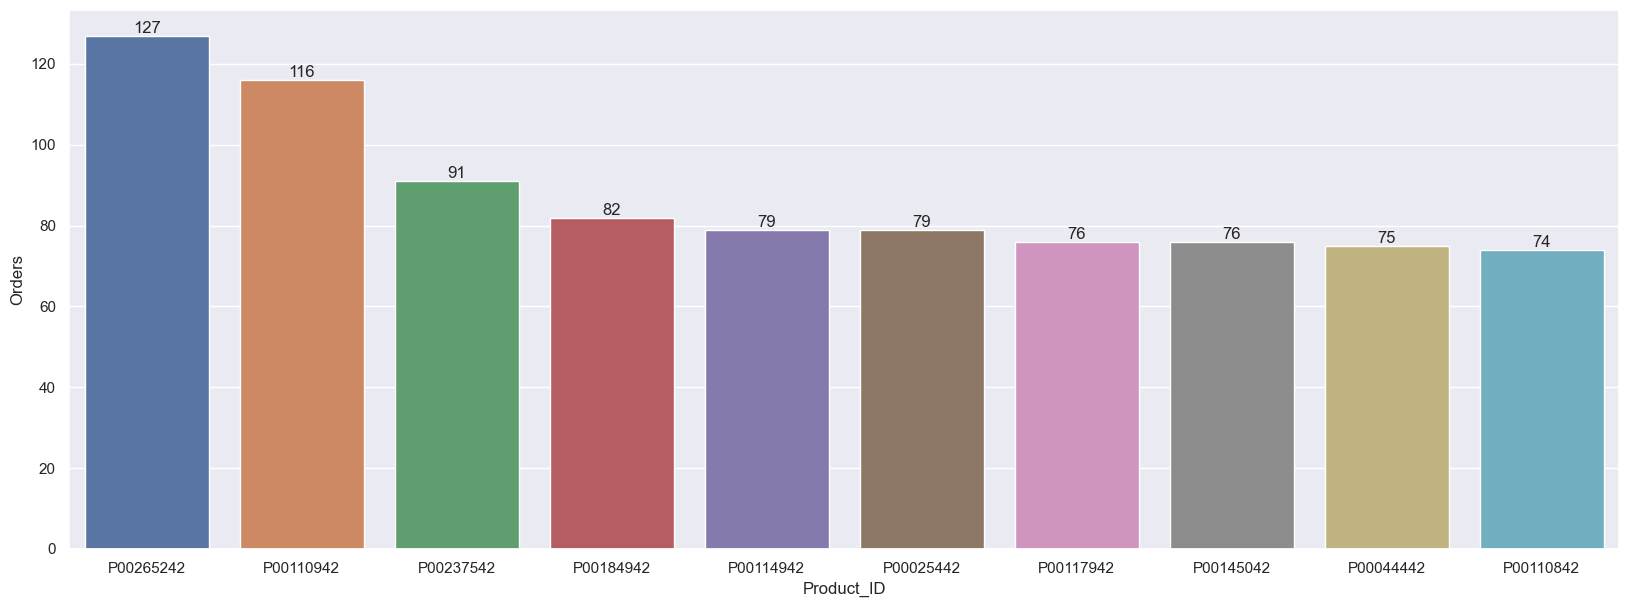

In [342]:
ax = sns.barplot(data = sales_state, x = 'Product_ID', y = 'Orders')

for bars in ax.containers:
    ax.bar_label(bars)

## Conclusion 

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*



*Thank you*